# Data Preprocessing

# 1. Obtaining Dataset(s)

In this notebook we clean the data and prepare it for training the deep reinforcement learning model.

We will be using the CIC-IDS 2017 dataset presented here: http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/

We will be specifically using the dataset named 'MachineLearningCSV.zip'. You can download it from the above link and skip the next cell, or run the next cell (provided you have wget) to download and extract the dataset to a folder in the project directory.

In [7]:
! wget http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/MachineLearningCSV.zip
! unzip MachineLearningCSV.zip -d dataset

--2021-11-01 23:12:34--  http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/MachineLearningCSV.zip
Connecting to 205.174.165.80:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 235102953 (224M) [application/zip]
Saving to: ‘MachineLearningCSV.zip’

MachineLearningCSV. 100%[===================>] 224.21M  5.29MB/s    in 91s     

2021-11-01 23:14:05 (2.46 MB/s) - ‘MachineLearningCSV.zip’ saved [235102953/235102953]

Archive:  MachineLearningCSV.zip
   creating: dataset/MachineLearningCVE/
  inflating: dataset/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv  
  inflating: dataset/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv  
  inflating: dataset/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv  
  inflating: dataset/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv  
  inflating: dataset/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv  
  inflating: dataset/MachineLearningCVE/Friday-Work

In [9]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 2. Cleaning the Data

## 2.1. Grouping all seven files into one from the CIC-IDS 2017 dataset

In [10]:
pd.set_option("display.max_columns", None) # we want to view all columns when printing

files = os.listdir("dataset/MachineLearningCVE/")

df = pd.read_csv(os.path.join("dataset/MachineLearningCVE/", files[0]))

for file in os.listdir("dataset/MachineLearningCVE/")[1:]:
    print(file)
    d = pd.read_csv(os.path.join("dataset/MachineLearningCVE/", file))
    df = pd.concat([df, d], axis=0)

del d # freeing up some space from memory

df.reset_index(drop=True, inplace=True)

Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Monday-WorkingHours.pcap_ISCX.csv
Friday-WorkingHours-Morning.pcap_ISCX.csv
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Wednesday-workingHours.pcap_ISCX.csv
Tuesday-WorkingHours.pcap_ISCX.csv


## 2.2 Reformatting column headers

In [11]:
# removing whitespace and converting to lowercase

df.columns = df.columns.str.lower()
df.columns = df.columns.str.lstrip()
df.columns = df.columns.str.replace(' ','_')

df.columns

Index(['destination_port', 'flow_duration', 'total_fwd_packets',
       'total_backward_packets', 'total_length_of_fwd_packets',
       'total_length_of_bwd_packets', 'fwd_packet_length_max',
       'fwd_packet_length_min', 'fwd_packet_length_mean',
       'fwd_packet_length_std', 'bwd_packet_length_max',
       'bwd_packet_length_min', 'bwd_packet_length_mean',
       'bwd_packet_length_std', 'flow_bytes/s', 'flow_packets/s',
       'flow_iat_mean', 'flow_iat_std', 'flow_iat_max', 'flow_iat_min',
       'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max',
       'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean', 'bwd_iat_std',
       'bwd_iat_max', 'bwd_iat_min', 'fwd_psh_flags', 'bwd_psh_flags',
       'fwd_urg_flags', 'bwd_urg_flags', 'fwd_header_length',
       'bwd_header_length', 'fwd_packets/s', 'bwd_packets/s',
       'min_packet_length', 'max_packet_length', 'packet_length_mean',
       'packet_length_std', 'packet_length_variance', 'fin_flag_count',
       'syn_flag_co

## 2.3 Dropping unnecessary columns

### 2.3.1 Dropping irrelevant features and columns with all 0s

In [12]:
df = df.drop('destination_port', axis=1) # destination port is not a relevant feature for our model to learn on
df = df.drop('fwd_header_length.1', axis=1) # idential to fwd_header_length, so we can remove this one
df = df.loc[:, (df != 0).any(axis=0)] # removing all columns where all values are 0

stats = df.describe()
stats

,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes/s,flow_packets/s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,fwd_urg_flags,fwd_header_length,bwd_header_length,fwd_packets/s,bwd_packets/s,min_packet_length,max_packet_length,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,cwe_flag_count,ece_flag_count,down/up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.829385e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,8.708495e+02,4.104958e+01,3.059493e+02,3.353257e+02,inf,inf,1.298449e+06,2.919271e+06,9.182475e+06,1.623796e+05,1.448296e+07,2.610193e+06,3.266957e+06,9.042939e+06,1.021893e+06,9.893830e+06,1.805784e+06,1.485973e+06,4.684692e+06,9.672614e+05,4.644646e-02,1.112782e-04,-2.599739e+04,-2.273275e+03,6.386535e+04,6.995192e+03,1.643450e+01,9.504024e+02,1.719444e+02,2.949756e+02,4.861548e+05,3.537976e-02,4.644646e-02,2.423392e-04,2.980705e-01,3.158443e-01,9.482316e-02,1.112782e-04,2.433990e-04,6.835004e-01,1.919837e+02,5.820194e+01,3.059493e+02,9.361160e+00,5.492919e+02,1.039377e+01,1.616230e+04,6.989837e+03,1.989433e+03,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,1.946367e+03,6.886260e+01,6.052568e+02,8.396932e+02,NaN,NaN,4.507944e+06,8.045870e+06,2.445954e+07,2.950282e+06,3.357581e+07,9.525722e+06,9.639055e+06,2.452916e+07,8.591436e+06,2.873661e+07,8.887197e+06,6.278469e+06,1.716095e+07,8.308983e+06,2.104500e-01,1.054826e-02,2.105286e+07,1.452209e+06,2.475371e+05,3.815170e+04,2.523772e+01,2.028229e+03,3.054915e+02,6.318001e+02,1.647490e+06,1.847378e-01,2.104500e-01,1.556536e-02,4.574107e-01,4.648513e-01,2.929706e-01,1.054826e-02,1.559935e-02,6.804920e-01,3.318603e+02,1.860912e+02,6.052568e+02,7.496728e+02,9.980070e+03,9.973883e+02,2.263057e+06,1.433873e+04,8.456883e+03,6.364257e+02,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.363008e+07,4.602984e+06,2.436689e+07,2.336342e+07
min,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.610000e+08,-2.000000e+06,-1.300000e+01,0.000000e+00,-1.300000e+01

### 2.3.2 Dropping NaNs and INFs

In [13]:
df.loc[df["flow_bytes/s"].isna(), "label"].value_counts()

DoS Hulk    949
BENIGN      409
Name: label, dtype: int64

In [14]:
inf_cols = stats.loc[:, stats.loc["max"] == np.inf]
inf_cols # features that have inf in their columns

,flow_bytes/s,flow_packets/s
count,2.829385e+06,2.830743e+06
mean,inf,inf
std,NaN,NaN
min,-2.610000e+08,-2.000000e+06
25%,1.193197e+02,3.446226e+00
50%,4.595549e+03,1.106684e+02
75%,1.666667e+05,2.325581e+04
max,inf,inf


In [15]:
df.replace(np.inf, np.nan, inplace=True) # replacing all inf values with null

df.dropna(inplace=True) # drop all rows with null values
df.reset_index(inplace=True, drop=True)

In [16]:
stats = df.describe()
stats

,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes/s,flow_packets/s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,fwd_urg_flags,fwd_header_length,bwd_header_length,fwd_packets/s,bwd_packets/s,min_packet_length,max_packet_length,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,cwe_flag_count,ece_flag_count,down/up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
count,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06
mean,1.480065e+07,9.368972e+00,1.040396e+01,5.498522e+02,1.617903e+04,2.078044e+02,1.872929e+01,5.825628e+01,6.897811e+01,8.717304e+02,4.108922e+01,3.062575e+02,3.356657e+02,1.491719e+06,7.085423e+04,1.299765e+06,2.922231e+06,9.191785e+06,1.625442e+05,1.449765e+07,2.612839e+06,3.270269e+06,9.052107e+06,1.022929e+06,9.903861e+06,1.807615e+06,1.487480e+06,4.689442e+06,9.682420e+05,4.639595e-02,1.113910e-04,-2.602379e+04,-2.275588e+03,6.393010e+04,7.002284e+03,1.644888e+01,9.513591e+02,1.721137e+02,2.952720e+02,4.866468e+05,3.528266e-02,4.639595e-02,2.425849e-04,2.982836e-01,3.153147e-01,9.482948e-02,1.113910e-04,2.436458e-04,6.838443e-01,1.921707e+02,5.825628e+01,3.062575e+02,9.368972e+00,5.498417e+02,1.040396e+01,1.617869e+04,6.992389e+03,1.988290e+03,5.423519e+00,-2.744494e+03,8.163400e+04,4.117582e+04,1.533378e+05,5.835492e+04,8.324468e+06,5.043548e+05,8.704568e+06,7.928061e+06
std,3.366750e+07,7.500527e+02,9.978937e+02,9.998639e+03,2.264235e+06,7.175183e+02,6.035533e+01,1.861733e+02,2.813212e+02,1.947157e+03,6.888118e+01,6.054855e+02,8.400508e+02,2.594016e+07,2.544154e+05,4.510039e+06,8.049410e+06,2.447019e+07,2.951772e+06,3.358966e+07,9.530187e+06,9.643379e+06,2.453990e+07,8.595729e+06,2.874945e+07,8.891515e+06,6.281472e+06,1.716900e+07,8.313137e+06,2.103411e-01,1.055361e-02,2.106353e+07,1.452945e+06,2.476542e+05,3.817038e+04,2.524615e+01,2.029034e+03,3.055985e+02,6.320510e+02,1.648252e+06,1.844934e-01,2.103411e-01,1.557325e-02,4.575047e-01,4.646412e-01,2.929793e-01,1.055361e-02,1.560726e-02,6.805824e-01,3.319734e+02,1.861733e+02,6.054855e+02,7.500527e+02,9.985113e+03,9.978937e+02,2.264204e+06,1.434022e+04,8.454537e+03,6.367482e+02,1.085539e+06,6.489234e+05,3.935787e+05,1.026333e+06,5.773818e+05,2.364057e+07,4.605289e+06,2.437766e+07,2.337390e+07
min,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.610000e+08,-2.000000e+06,-1.3

## 2.4 Recategorizing benign versus attack labels

BENIGN percentage:  80.31893901995703  ATTACK percentage:  19.68106098004297


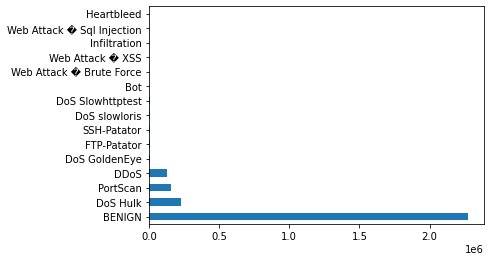

In [17]:
df.label.value_counts().plot.barh()
benign_percentage = len(df[df.label == 'BENIGN'])/len(df.index)*100
attack_percentage = 100 - benign_percentage
print("BENIGN percentage: ", benign_percentage, " ATTACK percentage: ", attack_percentage)

<AxesSubplot:>

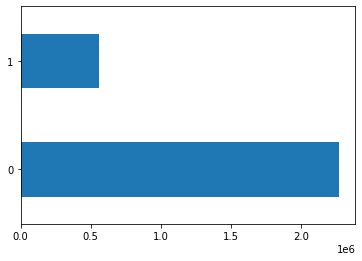

In [18]:
# As we can see above, the BENIGN count is ~80% of our cleaned data, while attack data is ~20%.

df["label"] = df["label"].map(
    lambda x: 0 if x == "BENIGN" else 1
)

df.label.value_counts().plot.barh()

# 3. Normalizing Data

In [19]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

df = normalize(df)

In [20]:
df.head()

,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes/s,flow_packets/s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,fwd_urg_flags,fwd_header_length,bwd_header_length,fwd_packets/s,bwd_packets/s,min_packet_length,max_packet_length,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,cwe_flag_count,ece_flag_count,down/up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,1.491667e-06,0.000000,0.000003,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.111921,0.335341,1.491667e-06,0.000000e+00,1.491667e-06,1.500000e-06,0.000,0.000000,0.00000,0.000000,9.999999e-08,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.999856,0.994592,2.008032e-03,0.003012,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.006410,0.000000,0.00000,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.004440,0.003723,0.0,1.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
1,7.999999e-07,0.000000,0.000007,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.111921,0.339357,4.541666e-07,1.250775e-07,5.166666e-07,4.000000e-07,0.000,0.000000,0.00000,0.000000,9.999999e-08,4.083333e-07,4.083333e-07,0.0,4.083333e-07,4.083333e-07,0.0,0.0,0.999856,0.994592,4.016064e-03,0.012048,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.012821,0.000000,0.00000,0.000000,0.000000,0.000000,0.000007,0.000000e+00,0.003723,0.004440,0.0,1.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
2,8.329999e-04,0.000000,0.000003,0.000004,7.323179e-08,0.001934,0.020645,0.00808,0.0,0.002458,0.016575,0.008275,0.0,0.111922,0.333337,8.329999e-04,0.000000e+00,8.329999e-04,8.330082e-04,0.000,0.000000,0.00000,0.000000,9.999999e-08,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.999856,0.994592,3.335101e-06,0.000005,0.033149,0.001934,0.014384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006410,0.018493,0.00808,0.008275,0.000000,0.000004,0.000003,7.323179e-08,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
3,3.085833e-04,0.000000,0.000003,0.000004,7.323179e-08,0.001934,0.020645,0.00808,0.0,0.002458,0.016575,0.008275,0.0,0.111922,0.333342,3.085833e-04,0.000000e+00,3.085833e-04,3.085916e-04,0.000,0.000000,0.00000,0.000000,9.999999e-08,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.999856,0.994592,9.004872e-06,0.000014,0.033149,0.001934,0.014384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006410,0.018493,0.00808,0.008275,0.000000,0.000004,0.000003,7.323179e-08,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
4,9.263445e-01,0.000664,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.111921,0.333334,6.344933e-03,2.995055e-02,1.133334e-01,1.166667e-07,0.925,0.006345,0.03002,0.113333,9.999999e-08,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.999856,0.994592,4.408007e-07,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000664,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,1.0,0.015943,0.028615,0.043845,8.636364

# 4. Train/Test/Validation Sets

In [21]:
X_train, X_test, y_train, y_test = train_test_split(             # using 15% of the data for testing
    df.iloc[:, :-1], df["label"], test_size=0.15, shuffle=True)

X_train, X_val, y_train, y_val = train_test_split(               # using 15% of the data for validation
    X_train, y_train, test_size=0.15, shuffle=True)

print("train percentage: ", len(X_train)/len(df.index) * 100, "%")
print("test percentage: ", len(X_test)/len(df.index) * 100, "%")
print("validation percentage ", len(X_val)/len(df.index) * 100, "%")

train percentage:  72.24995013925646 %
test percentage:  15.000021217337679 %
validation percentage  12.750028643405864 %


# 5. Saving Data

In [23]:
pd.concat([X_train, y_train], axis=1).to_csv("processed_data/train_data.csv", index=None)
pd.concat([X_test, y_test], axis=1).to_csv("processed_data/test_data.csv", index=None)
pd.concat([X_val, y_val], axis=1).to_csv("processed_data/validation_data.csv", index=None)